 ## CIFAR-10 Multiple Classes
 
 CIFAR-10 dataset which consists of 10 different image types.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### DATA
CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [4]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 56s 0us/step


In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [6]:
X_train[0].shape

(32, 32, 3)

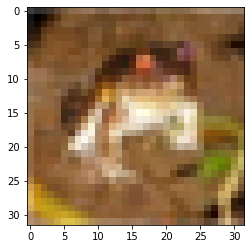

In [13]:
plt.imshow(X_train[0]) # Frog Image

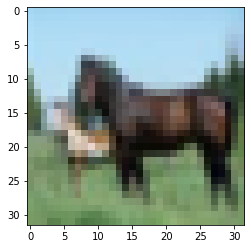

In [14]:
plt.imshow(X_train[12]) # Horse Image

### PreProcessing

In [15]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [16]:
X_train[0].shape

(32, 32, 3)

In [18]:
X_train[0].max()

255

In [19]:
X_train[0].min()

0

In [20]:
X_train = X_train/255
X_test = X_test/25

In [21]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Labels

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
print(y_train.shape)

(50000, 1)


In [27]:
y_train[0]

array([6], dtype=uint8)

In [29]:
y_cat_train = to_categorical(y_train, 10)
y_cat_train.shape

(50000, 10)

In [30]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [31]:
y_cat_test = to_categorical(y_test, 10)

### Building the Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [41]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(
                filters=32, 
                kernel_size=(4,4),
                input_shape=(32,32,3),
                activation='relu'
         )
         )
# POOLING LAYER
model.add(MaxPool2D(
                    pool_size=(2,2)
                    )
                    )


## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
model.add(Conv2D(
                filters=32, 
                kernel_size=(4,4),
                input_shape=(32,32,3),
                activation='relu'
         )
         )
# POOLING LAYER
model.add(MaxPool2D(
                    pool_size=(2,2)
                    )
                    )


# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(units=256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(units=10, activation='softmax'))

model.compile(
             optimizer='rmsprop',
             loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
                           monitor='val_loss',
                           patience=3
                          )

In [47]:
model.fit(
            X_train,
            y_cat_train,
            validation_data=(X_test, y_cat_test),
            epochs=15,
            callbacks=[early_stop]
         )

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 25s 502us/sample - loss: 1.5317 - accuracy: 0.4489 - val_loss: 6.6459 - val_accuracy: 0.4702
Epoch 2/15
50000/50000 [==============================] - 26s 527us/sample - loss: 1.1665 - accuracy: 0.5927 - val_loss: 11.6369 - val_accuracy: 0.4143
Epoch 3/15
50000/50000 [==============================] - 29s 576us/sample - loss: 1.0123 - accuracy: 0.6478 - val_loss: 8.4698 - val_accuracy: 0.4601
Epoch 4/15
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.9018 - accuracy: 0.6882 - val_loss: 6.7181 - val_accuracy: 0.5496


In [74]:
model.save('cifar_10epochs.h5')

In [75]:
losses = pd.DataFrame(model.history.history)

In [76]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.531651,0.44892,6.645936,0.4702
1,1.166462,0.59270,11.636890,0.4143
2,1.012283,0.64778,8.469824,0.4601
3,0.901808,0.68824,6.718132,0.5496


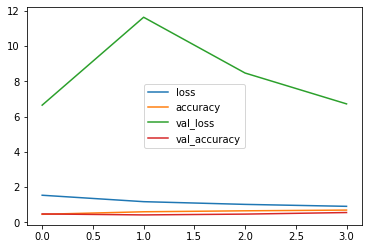

In [77]:
losses.plot()

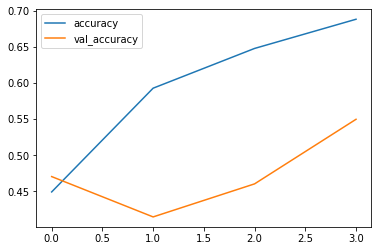

In [78]:
losses[['accuracy', 'val_accuracy']].plot()

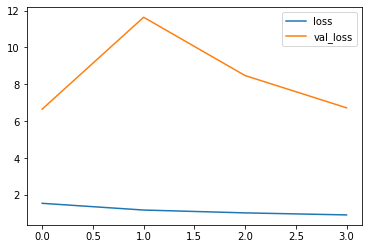

In [79]:
losses[['loss', 'val_loss']].plot()

In [80]:
model.metrics_names

['loss', 'accuracy']

In [81]:
print(model.metrics_names)
print(model.evaluate(X_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[6.718132015228272, 0.5496]


In [82]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(X_test)

In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.41      0.86      0.55      1000
           1       0.59      0.84      0.69      1000
           2       0.67      0.31      0.42      1000
           3       0.43      0.32      0.37      1000
           4       0.74      0.17      0.28      1000
           5       0.42      0.61      0.50      1000
           6       0.86      0.41      0.56      1000
           7       0.56      0.76      0.64      1000
           8       0.77      0.51      0.62      1000
           9       0.66      0.69      0.67      1000

    accuracy                           0.55     10000
   macro avg       0.61      0.55      0.53     10000
weighted avg       0.61      0.55      0.53     10000



In [84]:
confusion_matrix(y_test, predictions)

array([[861,  38,   9,  10,   5,   8,   0,  17,  21,  31],
       [ 48, 843,   3,   2,   1,   7,   2,   7,  16,  71],
       [244,  41, 312,  75,  15, 159,  14,  90,  18,  32],
       [127,  52,  29, 320,  15, 271,  19,  98,  30,  39],
       [187,  54,  58,  96, 172, 179,  17, 203,  20,  14],
       [ 82,  15,  27, 100,   4, 612,   7, 121,   6,  26],
       [ 95, 124,  20, 104,   8, 123, 411,  38,  28,  49],
       [ 61,  28,   7,  23,  10,  67,   3, 764,   5,  32],
       [301,  84,   3,  18,   4,   9,   2,   5, 513,  61],
       [107, 153,   1,   4,   0,   8,   2,  26,  11, 688]])

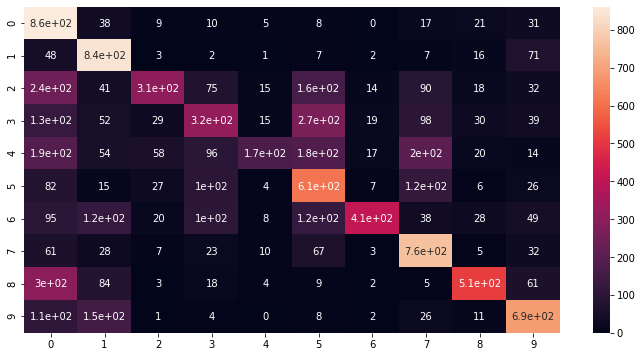

In [85]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

### Predicting a given image

In [96]:
my_image=X_test[16]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


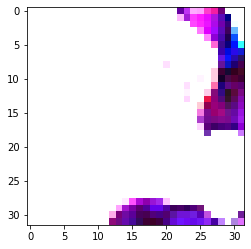

In [97]:
plt.imshow(my_image)

In [98]:
my_image

array([[[3.8 , 3.04, 3.12],
        [3.68, 3.08, 3.12],
        [3.56, 3.08, 3.08],
        ...,
        [1.2 , 1.12, 1.52],
        [7.  , 7.32, 7.64],
        [9.  , 9.36, 9.6 ]],

       [[3.6 , 2.84, 2.92],
        [3.44, 2.88, 2.88],
        [3.32, 2.84, 2.84],
        ...,
        [0.  , 0.  , 0.52],
        [2.4 , 2.52, 3.16],
        [6.6 , 6.84, 7.56]],

       [[3.52, 2.76, 2.84],
        [3.36, 2.8 , 2.8 ],
        [3.28, 2.8 , 2.8 ],
        ...,
        [0.2 , 0.  , 0.48],
        [0.96, 1.04, 1.92],
        [5.08, 5.56, 6.6 ]],

       ...,

       [[8.12, 7.04, 6.44],
        [8.52, 7.  , 6.24],
        [8.08, 6.6 , 6.2 ],
        ...,
        [7.28, 7.32, 7.56],
        [4.72, 4.8 , 5.  ],
        [1.48, 1.28, 1.84]],

       [[4.92, 3.76, 3.6 ],
        [8.4 , 6.8 , 6.28],
        [8.44, 6.84, 6.4 ],
        ...,
        [4.64, 4.64, 4.8 ],
        [1.76, 1.8 , 1.88],
        [0.44, 0.12, 0.6 ]],

       [[4.08, 3.4 , 3.36],
        [8.32, 7.32, 7.  ],
        [8.6 , 7

In [99]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5])

In [100]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html